## Feature Engineering
Based on EDA, there are several feature that will be added to achieve best metrics.

In [58]:
import pandas as pd
import numpy as np 
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
house_variables = joblib.load('../output/x_train.pkl')
house_target = joblib.load('../output/y_train.pkl')

In [4]:
def clean(df):
    df["Exterior2nd"] = df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
    # Some values of GarageYrBlt are corrupt, so we'll replace them
    # with the year the house was built
    df["GarageYrBlt"] = df["GarageYrBlt"].where(df.GarageYrBlt <= 2010, df.YearBuilt)
    # Names beginning with numbers are awkward to work with
    df.rename(columns={
        "1stFlrSF": "FirstFlrSF",
        "2ndFlrSF": "SecondFlrSF",
        "3SsnPorch": "Threeseasonporch",
    }, inplace=True,
    )
    return df

In [19]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")
    return df

In [43]:
def mathematical_transforms(df):
    df["LivLotRatio"] = df.GrLivArea / df.LotArea
    df["Spaciousness"] = (df.FirstFlrSF + df.SecondFlrSF) / df.TotRmsAbvGrd
    df["_OQuGLA"] = df.OverallQual * df.GrLivArea
    return df
    
def break_down(df):
    X = pd.DataFrame()
    X["MSClass"] = df.MSSubClass.str.split("_", n=1, expand=True)[0]
    return X


def group_transforms(df):
    X = pd.DataFrame()
    X["MedNhbdArea"] = df.groupby("Neighborhood")["GrLivArea"].transform("median")
    return X

In [40]:
house_variables = clean(house_variables)
house_variables = impute(house_variables)

In [44]:
house_variables_transform = mathematical_transforms(house_variables)

In [53]:
# Getting non-categorical variables
# Need more sanity check
non_categorical_cols = []
columns = house_variables_transform.columns
for col in columns:
    if house_variables_transform[col].dtype != 'object':
        non_categorical_cols.append(col)
print('\n'.join(non_categorical_cols))

house_variables_transform_non_cat = house_variables_transform[non_categorical_cols]
house_variables_transform_cat = house_variables_transform[[x for x in columns if x not in non_categorical_cols]]

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
FirstFlrSF
SecondFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
Threeseasonporch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
LivLotRatio
Spaciousness
_OQuGLA


In [61]:
house_df = pd.concat([house_variables_transform_non_cat, house_target], axis=1, join='inner')

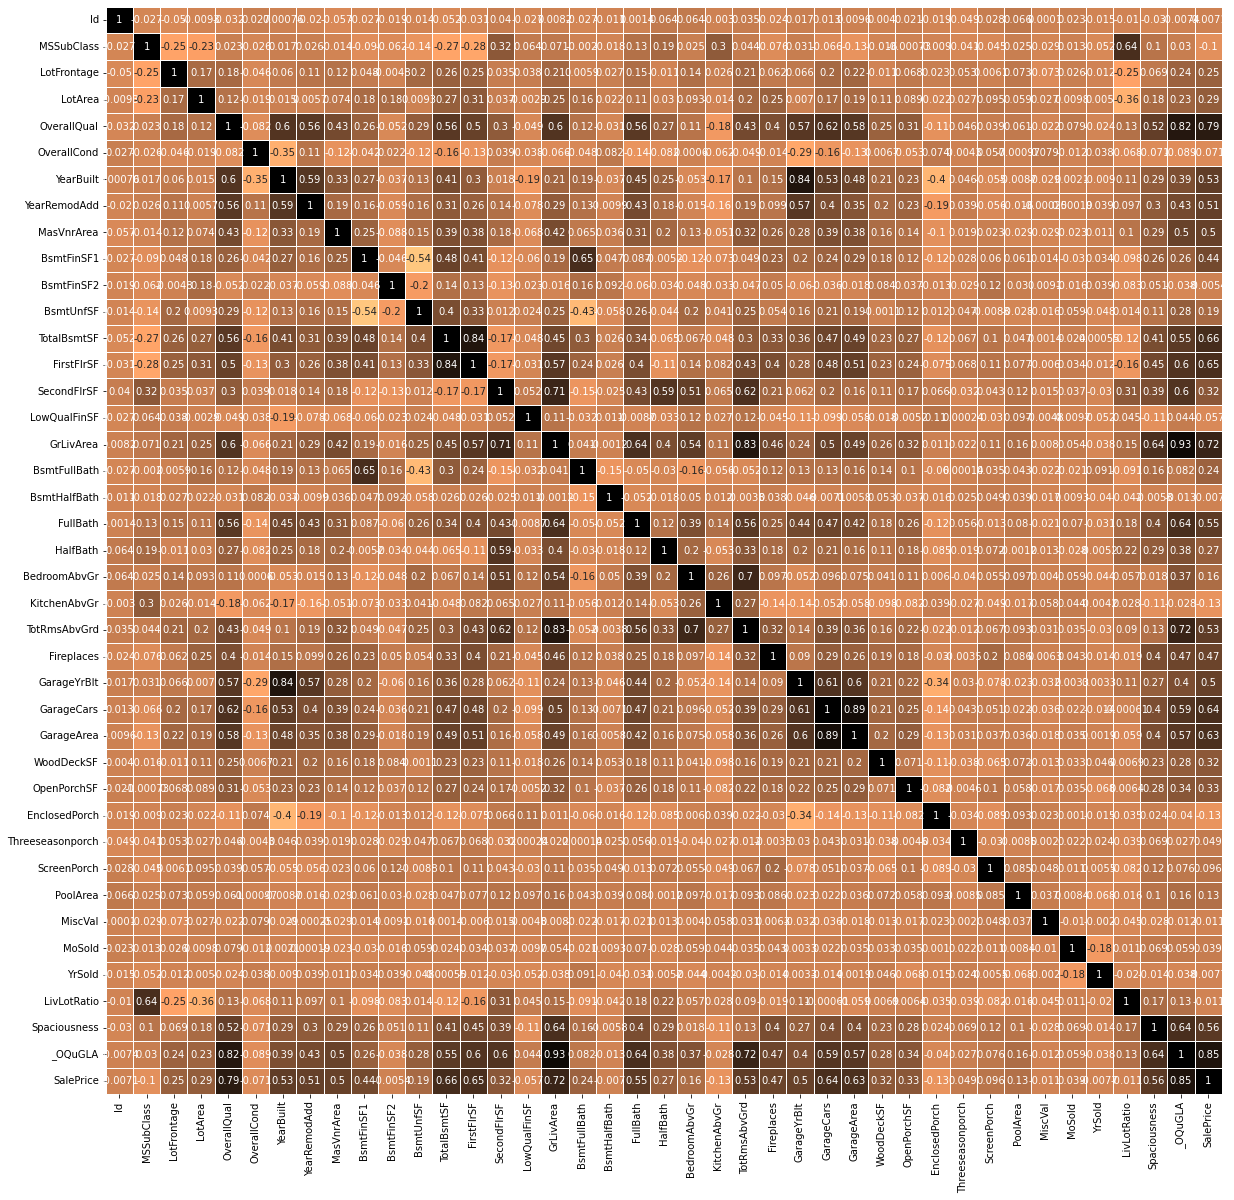

In [60]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(house_df.corr(), annot=True, linewidths=.5, ax=ax, cbar=False, cmap=plt.cm.copper_r)
plt.show()

### Result of Feature Engineering
Looks like all the new feature get a high correlation with SalePrice